In [19]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import twitter_samples
import nbimporter
from nltk.corpus import stopwords 
import nbimporter
from os import getcwd
import matplotlib.pyplot as plt

In [20]:
from funcs import prepro_tweet, visual_class, count_dict, test_naive_bayes, train_naive_bayes, naive_bayes_predict

In [3]:
from funcs import get_ratio, get_words_by_threshold, missclassNb, tweet_likelihood, confidence_ellipse

# Data Load

Prepare the data. The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

## Visualizing the class balance

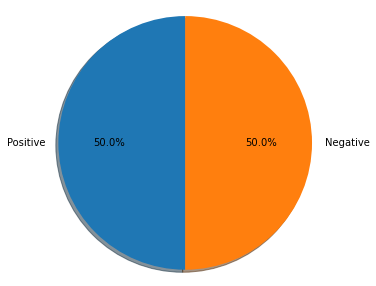

In [6]:
visual_class(['Positive', 'Negative'], [len(train_pos), len(train_neg)])

# Dictionary building

Create the frequency dictionary using the imported count_dict() function. The key is the tuple (word, label), such as ("happy",1) or ("happy",0). The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [7]:
# create frequency dictionary
freqs = count_dict(train_x, train_y)

# Train Naive Bias

Given a freqs dictionary, train_x (a list of tweets) and a train_y (a list of labels for each tweet), we are going to implement a naive bayes classifier using 'train_naive_bayes' which returns the logprior and log likelihood dictionary of words and their likelihoods as its keys and values respectively.

To calculate logprior we need to calculate the number of documents (tweets)  𝐷 , as well as the number of positive documents (tweets)  𝐷𝑝𝑜𝑠  and number of negative documents (tweets)  𝐷𝑛𝑒𝑔 .
Calculate the probability that a document (tweet) is positive  𝑃(𝐷𝑝𝑜𝑠) , and the probability that a document (tweet) is negative  𝑃(𝐷𝑛𝑒𝑔).
The logprior is  𝑙𝑜𝑔(𝐷𝑝𝑜𝑠)−𝑙𝑜𝑔(𝐷𝑛𝑒𝑔) 

To compute compute the loglikelihood for each word we use the formula 𝑙𝑜𝑔(𝑃(𝑊𝑝𝑜𝑠)/𝑃(𝑊𝑛𝑒𝑔))
Where 𝑃(𝑊𝑝𝑜𝑠) and 𝑃(𝑊𝑛𝑒𝑔) are positive and negative probability of each word that could be calculated using the equations:

𝑃(𝑊𝑝𝑜𝑠)=(𝑓𝑟𝑒𝑞𝑝𝑜𝑠+1)/(𝑁𝑝𝑜𝑠+𝑉)
𝑃(𝑊𝑛𝑒𝑔)=(𝑓𝑟𝑒𝑞𝑛𝑒𝑔+1)(𝑁𝑛𝑒𝑔+𝑉)

Where 𝑉 is the number of unique words that appear in the freqs dictionary regardless of the label.
𝑁𝑝𝑜𝑠  and  𝑁𝑛𝑒𝑔 are the total number of positive words and total number of negative words;
𝑓𝑟𝑒𝑞𝑝𝑜𝑠  and  𝑓𝑟𝑒𝑞𝑛𝑒𝑔 are the positive and negative frequency of each word  𝑓𝑟𝑒𝑞𝑝𝑜𝑠  and  𝑓𝑟𝑒𝑞𝑛𝑒𝑔.

In [8]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)# our logprior is 0 since our positive to negative ratio is 50%/50%
print(len(loglikelihood))

0.0
9085


# Test the naive bayes model

Implement naive_bayes_predict function that takes in the tweet, logprior, loglikelihood.
and returns the likelihood that the tweet belongs to the positive(>0) or negative class(<=0).
For each tweet it sums up loglikelihoods of each word in the tweet and then adds the logprior to this sum to get the predicted sentiment of that tweet.

𝑝=𝑙𝑜𝑔𝑝𝑟𝑖𝑜𝑟+∑𝑖𝑁(𝑙𝑜𝑔𝑙𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑𝑖)

In [9]:
my_tweet = "It's been a horrible and tyiring day today."
l_s = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', l_s)

The expected output is -1.019805245406983


To test the accuracy of our algorythm we will implement test_naive_bayes function.
The function takes in your test_x, test_y, log_prior, and loglikelihood and returns the accuracy of our model.

In [10]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9940


In [11]:
for tweet in ['I feel so good after I finish a project', 'Fantastic job today', 'something weird is going on', 'troubles are here (:', 'great great']:

    p = naive_bayes_predict(tweet, logprior, loglikelihood)

    print(f'{tweet} -> {p:.2f}')

I feel so good after I finish a project -> 0.43
Fantastic job today -> 3.55
something weird is going on -> -0.92
troubles are here (: -> -1.24
great great -> 4.28


# Error Analysis

This part shows some tweets that the model missclassified.

In [12]:
missclassNb(test_x, test_y, logprior, loglikelihood)

Truth Predicted Tweet
1	0.00	b''
1	0.00	b'truli later move know queen bee upward bound movingonup'
1	0.00	b'new report talk burn calori cold work harder warm feel better weather :p'
1	0.00	b'harri niall 94 harri born ik stupid wanna chang :D'
1	0.00	b''
1	0.00	b''
1	0.00	b'park get sunlight'
1	0.00	b'uff itna miss karhi thi ap :p'
0	1.00	b'hello info possibl interest jonatha close join beti :( great'
0	1.00	b'u prob fun david'
0	1.00	b'pat jay'
0	1.00	b'whatev stil l young >:-('


## Filter words by Ratio of positive to negative counts. 

Some words have more positive counts than others, and can be considered "more positive" others more negative.
To define the level of positiveness or negativeness we are going to compare the positive to negative frequency of the word.
And with the get_words_by_threshold function we can calculate the ratio of positive to negative frequencies of a word using get_ratio function and filter a subset of words that have a minimum or maximum ratio of positivity / negativity or higher/lower.

In [13]:
# find negative words at or below a threshold
get_words_by_threshold(freqs, label=0, threshold=0.05)

{':(': {'positive': 1, 'negative': 3663, 'ratio': 0.0005458515283842794},
 ':-(': {'positive': 0, 'negative': 378, 'ratio': 0.002638522427440633},
 'zayniscomingbackonjuli': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '26': {'positive': 0, 'negative': 20, 'ratio': 0.047619047619047616},
 '>:(': {'positive': 0, 'negative': 43, 'ratio': 0.022727272727272728},
 'lost': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '♛': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 '》': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 'beli̇ev': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'wi̇ll': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'justi̇n': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｓｅｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｍｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776}}

In [14]:
# find positive words at or above a threshold
get_words_by_threshold(freqs, label=1, threshold=10)

{'followfriday': {'positive': 23, 'negative': 1, 'ratio': 12.0},
 'commun': {'positive': 27, 'negative': 1, 'ratio': 14.0},
 ':)': {'positive': 2847, 'negative': 2, 'ratio': 949.3333333333334},
 ':D': {'positive': 498, 'negative': 1, 'ratio': 249.5},
 ':p': {'positive': 103, 'negative': 1, 'ratio': 52.0},
 ':-)': {'positive': 543, 'negative': 1, 'ratio': 272.0},
 "here'": {'positive': 20, 'negative': 1, 'ratio': 10.5},
 'bam': {'positive': 44, 'negative': 1, 'ratio': 22.5},
 'warsaw': {'positive': 44, 'negative': 1, 'ratio': 22.5},
 ';)': {'positive': 22, 'negative': 1, 'ratio': 11.5},
 'stat': {'positive': 51, 'negative': 1, 'ratio': 26.0},
 'arriv': {'positive': 57, 'negative': 4, 'ratio': 11.6},
 'via': {'positive': 60, 'negative': 1, 'ratio': 30.5},
 'glad': {'positive': 41, 'negative': 2, 'ratio': 14.0},
 'blog': {'positive': 27, 'negative': 1, 'ratio': 14.0},
 'fback': {'positive': 26, 'negative': 1, 'ratio': 13.5}}

# Visualizing Naive Bayes

For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.

In [16]:
data = tweet_likelihood(freqs, train_y, train_x)

In [17]:
data.head()

,positive,negative,sentiment
0,-46.448531,-64.060615,1.0
1,-106.861844,-115.623383,1.0
2,-57.811093,-68.027051,1.0
3,-10.251639,-18.791703,1.0
4,-127.217423,-139.854690,1.0


Let's plot the numerator and denominator of the likelihood ratio for each tweet

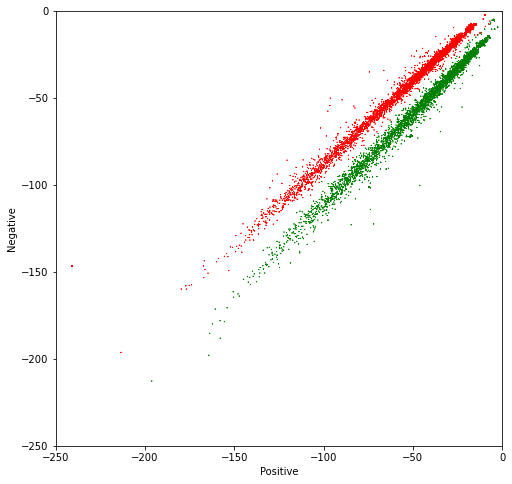

In [21]:
fig, ax = plt.subplots(figsize = (8, 8)) #Create a new figure with a custom size

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment
ax.scatter(data.positive, data.negative, 
    c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for each tweet

# Custom limits for this chart
plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label
plt.show()

## Using Confidence Ellipses to interpret Naïve Bayes

In [22]:

Use the confidence ellipse to understand the Naïve Bayes model.

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a 
cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. 
Confidence ellipses summarize the information of the dataset with only four parameters:
Center: It is the numerical mean of the attributes
Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard 
deviations used to plot the ellipse.
Angle: Related with the covariance among attributes.
The parameter n_std stands for the number of standard deviations bounded by the ellipse. Remember that for normal 
random distributions:

About 68% of the area under the curve falls within 1 standard deviation around the mean.
About 95% of the area under the curve falls within 2 standard deviations around the mean.
About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

SyntaxError: invalid syntax (<ipython-input-22-caf8fd97d087>, line 1)

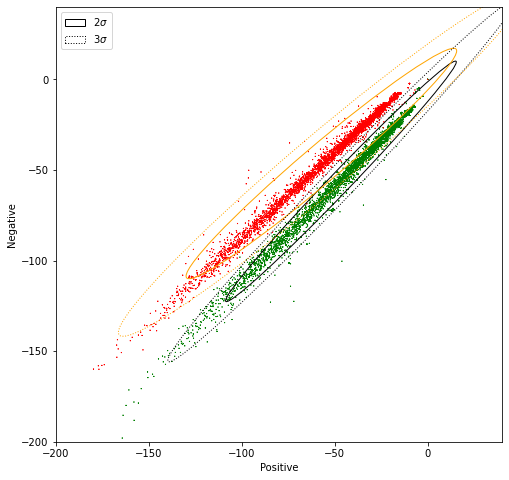

In [23]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()